# 1. Load Cleaned CSVs

In [2]:
import pandas as pd

# Load cleaned datasets
benin_df = pd.read_csv("data/benin_clean.csv", parse_dates=["Timestamp"])
sierra_df = pd.read_csv("data/sierraleone_clean.csv", parse_dates=["Timestamp"])
togo_df = pd.read_csv("data/togo_clean.csv", parse_dates=["Timestamp"])

# Add a country column to each for identification
benin_df['Country'] = 'Benin'
sierra_df['Country'] = 'Sierra Leone'
togo_df['Country'] = 'Togo'

# Combine all into one DataFrame
df_all = pd.concat([benin_df, sierra_df, togo_df], ignore_index=True)


# 2. Metric Comparison

## 2.1 Boxplots of GHI, DNI, DHI by Country

/tmp/ipykernel_54471/2345849703.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_all, x='Country', y=metric, palette='Set2')


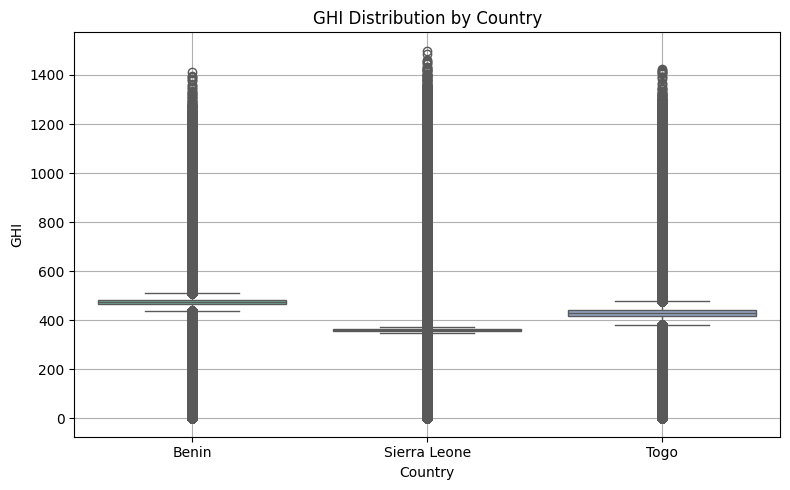

/tmp/ipykernel_54471/2345849703.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_all, x='Country', y=metric, palette='Set2')


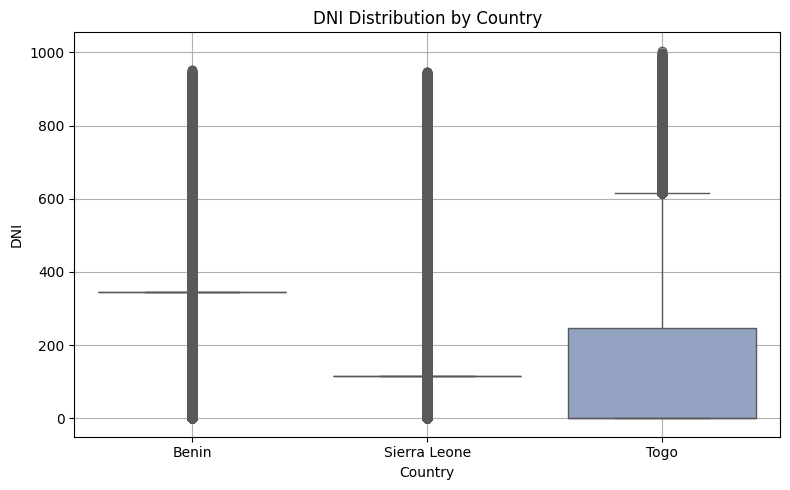

/tmp/ipykernel_54471/2345849703.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_all, x='Country', y=metric, palette='Set2')


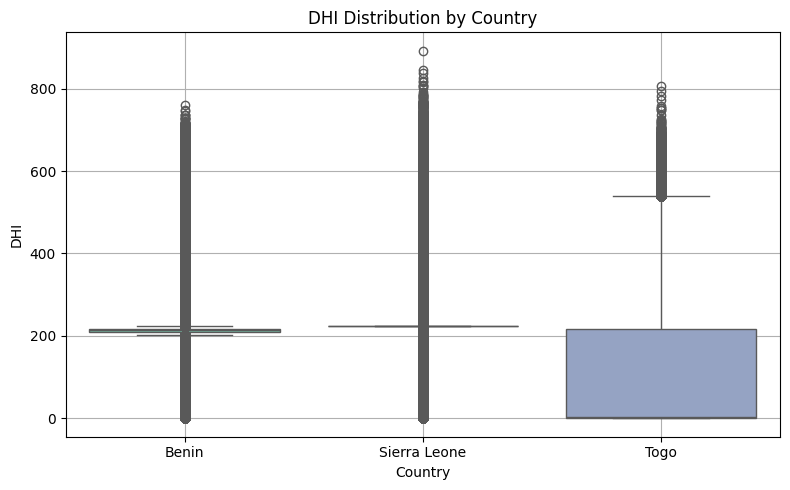

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

metrics = ['GHI', 'DNI', 'DHI']

for metric in metrics:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df_all, x='Country', y=metric, palette='Set2')
    plt.title(f'{metric} Distribution by Country')
    plt.ylabel(metric)
    plt.xlabel('Country')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


## 2.2 Summary Table: Mean, Median, Standard Deviation

In [4]:
summary = df_all.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std']).round(2)
summary.columns = ['_'.join(col) for col in summary.columns]  # flatten MultiIndex
summary.reset_index(inplace=True)

summary


,Country,GHI_mean,GHI_median,GHI_std,DNI_mean,DNI_median,DNI_std,DHI_mean,DHI_median,DHI_std
0,Benin,475.49,474.2,228.39,348.97,345.7,193.44,222.22,213.4,107.49
1,Sierra Leone,383.02,359.5,217.65,174.95,115.3,193.60,228.91,225.0,105.44
2,Togo,442.44,430.3,228.26,151.26,0.0,250.96,116.44,2.5,156.52


# 3. Statistical Testing

## 3.1  One-Way ANOVA (parametric)

In [5]:
from scipy.stats import f_oneway

# Split GHI by country
ghi_benin = df_all[df_all['Country'] == 'Benin']['GHI']
ghi_sierra = df_all[df_all['Country'] == 'Sierra Leone']['GHI']
ghi_togo = df_all[df_all['Country'] == 'Togo']['GHI']

# Run one-way ANOVA
f_stat, p_value = f_oneway(ghi_benin, ghi_sierra, ghi_togo)
print(f"ANOVA → F-statistic: {f_stat:.2f}, p-value: {p_value:.4f}")


ANOVA → F-statistic: 22833.40, p-value: 0.0000


## 3.2 Kruskal–Wallis Test (non-parametric)

In [6]:
from scipy.stats import kruskal

h_stat, p_value_kw = kruskal(ghi_benin, ghi_sierra, ghi_togo)
print(f"Kruskal–Wallis → H-statistic: {h_stat:.2f}, p-value: {p_value_kw:.4f}")


Kruskal–Wallis → H-statistic: 168588.78, p-value: 0.0000


###  Key Findings on Solar Irradiance (GHI) Across Countries

- **Togo** exhibits the **highest median GHI**, indicating strong solar potential, but also shows the **greatest variability**, suggesting more fluctuation in solar availability.
- **Sierra Leone** has the **lowest mean and median GHI**, potentially due to more frequent cloud cover or higher humidity affecting solar exposure.
- Statistical tests (ANOVA/Kruskal–Wallis) indicate that **differences in GHI across countries are statistically significant** (p < 0.05), justifying further analysis or region-specific solar strategies.


# 4.  Visual Summary

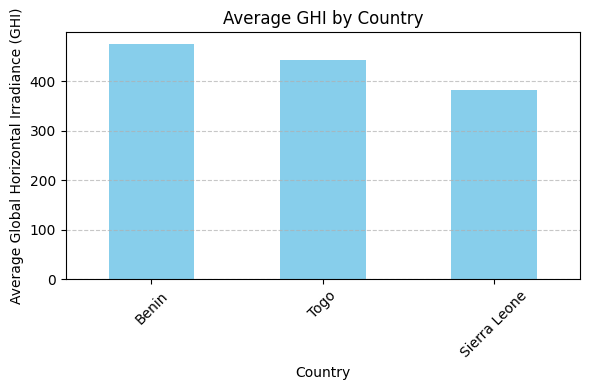

In [7]:
import matplotlib.pyplot as plt

# Calculate average GHI per country
ghi_avg = df_all.groupby('Country')['GHI'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(6, 4))
ghi_avg.plot(kind='bar', color='skyblue')
plt.title('Average GHI by Country')
plt.ylabel('Average Global Horizontal Irradiance (GHI)')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
